In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
#set all of the global variables
c = 4.
epsilon = 1.2
N = 30 #no.of neurons
N_i = 30 #no. of iterations
theta_0 = 0.#orientation of the stimuli
theta_i = np.linspace(-np.pi/2.,np.pi/2., 30)#neuron preferred orientation

In [10]:
#function to generate the external inputs 
def h_i(theta_n,theta, c, epsilon):
    h = c*((1-epsilon)+epsilon*np.cos(2*(theta_n-theta)))
    return h
   # plt.plot(theta_i,h)
   # plt.show()

In [13]:
#further variables
h_1=h_i(theta_i,theta_0,c,epsilon)
T=0.
beta=0.1
h_2=np.linspace(-15.,15.,N_i)
g = np.zeros_like(h_2)

In [15]:
#inputs to neurons non-linearly filtered given activation function g_act
def g_act(h,T):
    g = np.zeros_like(h,dtype=float)
    g[h>T] = beta*(h[h>T]-T)
    g[h>(T+(1./0.1))] = np.ones_like(h[h>(T+(1./0.1))], dtype=float)
    return g

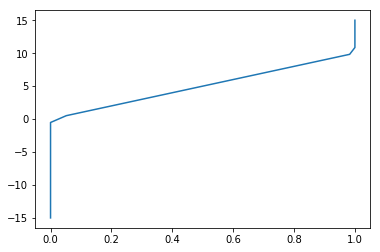

In [17]:
#result of the linear filter
g_1 = g_act(h_2, T)
#plot the result
plt.plot(g_1, h_2)
plt.show()
trange=np.linspace(0.,100.,N_i)
tau=5.

In [20]:
#rate based neuron model
def iaf(g_in,tau):
    trange=np.linspace(0.,100.,N_i)
    m=np.zeros_like(g_1,dtype=float)
    for i in range(1,len(trange)):  
            m[i]=m[i-1]+((trange[i]-trange[i-1])/tau)*(-m[i-1]+g_in[i])
            return m
    plt.plot(trange,m)
    plt.show()

act = iaf(g_1,tau)
j_0 = 86.
j_2 = 112.

In [21]:
#matrix of connections between the N neurons
def create_matrix(j_0,j_2,thetai):
    j_matrix=np.zeros((N,N))
    for i in range(len(thetai)):
        for j in range(len(thetai)):
            j_matrix[i,j]=j_0+j_2*np.cos(2*(thetai[i]-thetai[j]))
    return j_matrix


In [22]:
#input to the neurons with recurrent connections
def recurrent_connections(j_m, m_j, h_ext):
    h_i = np.dot(j_m, m_j)+h_ext
    return h_i
    

In [26]:
#results
M=create_matrix(j_0,j_2,theta_i)
#print test
#plt.pcolor(test)
#plt.show() 
h_in=recurrent_connections(M,act,h_1)
print(h_in)

[-5.6        -5.48777867 -5.15636201 -4.62124672 -3.90745417 -3.04836052
 -2.08413602 -1.05986676 -0.02344642  0.97666315  1.89369791  2.68477836
  3.31291445  3.74873522  3.97186219  3.97186219  3.74873522  3.31291445
  2.68477836  1.89369791  0.97666315 -0.02344642 -1.05986676 -2.08413602
 -3.04836052 -3.90745417 -4.62124672 -5.15636201 -5.48777867 -5.6       ]


In [27]:
act_1=g_act(h_in,T)
print(act_1)


[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.09766631  0.18936979  0.26847784  0.33129144
  0.37487352  0.39718622  0.39718622  0.37487352  0.33129144  0.26847784
  0.18936979  0.09766631  0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]


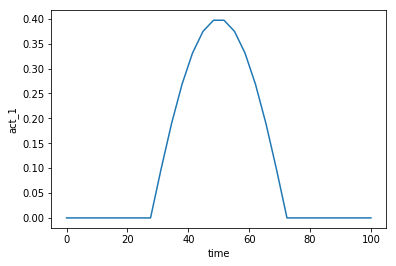

In [28]:
#plot results of activation function
plt.plot(trange, act_1)
plt.xlabel('time')
plt.ylabel('act_1')
plt.show()